# Introduction 

This Jupyter Notebook contains analysis of Coursera Courses dataset. Herein the notebook will provide and describe steps of data cleaning, data preprocessing, exploratory data analysis, visualizations, some comparisons, correlation calculations and finalise with giving improvements and conclusion.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import plotly.express as px
import itertools
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
from typing import Union
from wordcloud import WordCloud, STOPWORDS
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')

# Loading Coursera data

In [2]:
# Importing the coursera data

coursera_data = pd.read_csv('./coursea_data.csv', sep=',', index_col=0)
coursera_data.head()

course_title  \
134  (ISC)² Systems Security Certified Practitioner...   
743  A Crash Course in Causality:  Inferring Causal...   
874                     A Crash Course in Data Science   
413                            A Law Student's Toolkit   
635                A Life of Happiness and Fulfillment   

            course_organization course_Certificate_type  course_rating  \
134                      (ISC)²          SPECIALIZATION            4.7   
743  University of Pennsylvania                  COURSE            4.7   
874    Johns Hopkins University                  COURSE            4.5   
413             Yale University                  COURSE            4.7   
635   Indian School of Business                  COURSE            4.8   

    course_difficulty course_students_enrolled  
134          Beginner                     5.3k  
743      Intermediate                      17k  
874             Mixed                     130k  
413             Mixed                      91k  
635             Mixed                     320k

# Data cleaning

### Checking if any row of a feature is nan or null?
<p> In the below cells we are investigating if any value in the rows of features at a dataframe is null or nan and how many such values there are. </p>
<p> In the first output cell we expect a boolean value to be False if there are no null values for the columns, otherwise if there is at least one null value - True.</p>
<p> In the second output cell the value should be 0 if there are no null and nan values, otherwise an integer value (1 or more). </p

In [3]:
coursera_data.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

In [4]:
print('NaN values')
print(coursera_data.isna().sum())
print('Null values')
print(coursera_data.isnull().sum())

NaN values
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64
Null values
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64


In [5]:
# # Heatmap of null values:
# sns.heatmap(coursera_data.isnull(),cbar=False, yticklabels=False, cmap = 'viridis');
# # Output: purple as no null values identified.

<p> In the below cells we run commands to look at the brief summary of coursera dataset and the most important values ('SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE' & 'Beginner', 'Intermediate', 'Mixed', 'Advanced') to be visualized and anlyused. </p>

In [6]:
coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


In [7]:
coursera_data['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [8]:
coursera_data['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

### Checking if there are any duplicates?
<p> In the below cell we are checking if a row across all features in a dataframe contains duplicate values. </p>
<p> In the first output we expect a boolean value to be False if there are no duplicated rows. </p>
<p> In the second output cell we expect it to return 0 to specify zero duplicated values. </p>

In [9]:
coursera_data.duplicated(coursera_data.columns)

134    False
743    False
874    False
413    False
635    False
       ...  
236    False
883    False
545    False
875    False
163    False
Length: 891, dtype: bool

In [10]:
coursera_data.duplicated(coursera_data.columns).sum()

0

### How many observations and features there are?
<p> In the below cell we are counting row numbers of index as observations and column numbers as features. </p>
<p> In the output cell we are displaying the number of rows (891) and columns (6). There are 891 observations and 6 features. </p>

In [11]:
print("Observations: " + str(len(coursera_data.index)))
print("Features: " + str(len(coursera_data.columns)))
# coursera_data.shape

Observations: 891
Features: 6


## Data preprocessing
<p> As we saw when we inspected the first few values of data above, the column 'course_students_enrolled' is of the type object even though it should be float. That is due to the "k" or "m" after the number. </p>
<p> Thus we need to deal with that before starting any analysis and designed a function to change the values to floats. </p>

In [12]:
def value_to_float(x: Union[object, float]) -> float:
    """ A function to convert value to a float """
    if type(x) == float:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('m', '')) * 1000000000
    return 0

coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].apply(value_to_float)

# Alternative way:
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('k','*1000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('m','*1000000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].map(lambda x: eval(x))

In [13]:
coursera_data.head()

course_title  \
134  (ISC)² Systems Security Certified Practitioner...   
743  A Crash Course in Causality:  Inferring Causal...   
874                     A Crash Course in Data Science   
413                            A Law Student's Toolkit   
635                A Life of Happiness and Fulfillment   

            course_organization course_Certificate_type  course_rating  \
134                      (ISC)²          SPECIALIZATION            4.7   
743  University of Pennsylvania                  COURSE            4.7   
874    Johns Hopkins University                  COURSE            4.5   
413             Yale University                  COURSE            4.7   
635   Indian School of Business                  COURSE            4.8   

    course_difficulty  course_students_enrolled  
134          Beginner                    5300.0  
743      Intermediate                   17000.0  
874             Mixed                  130000.0  
413             Mixed                   91000.0  
635             Mixed                  320000.0

### Scaling & Normalisation 

<p> In the below cell we see the scaling of coursera numeric data ('course_rating'). </p>
<p> In the first output cell (left) we see the original coursera data while on the right it is scaled data for 'course_rating' values. </p>

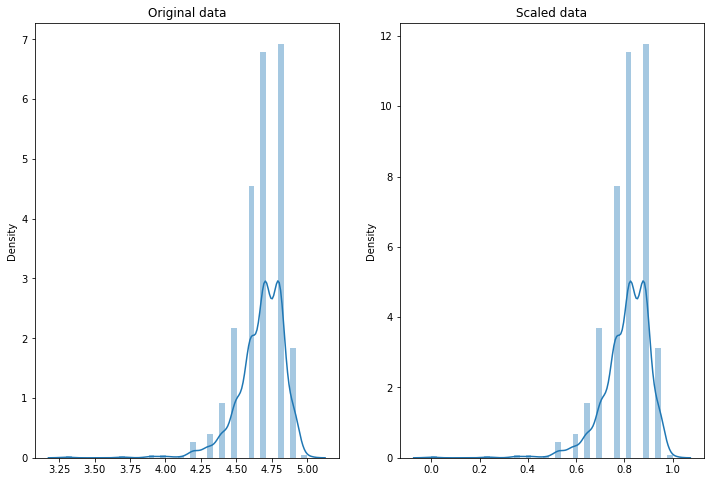

In [16]:
# Min-max scale the data between 0 and 1
scaled_data = minmax_scaling(coursera_data['course_rating'], columns=[0])

# Plot both together to compare
fig, ax = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [12.00, 8.00]
sns.distplot(coursera_data['course_rating'], ax=ax[0])
ax[0].set_title("Original data")
ax[0].grid(False)
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
ax[1].set(ylabel='Density');
ax[1].grid(False)

<p> In below cell we see the normalisation of coursera 'course_rating' numeric data. </p>
<p> In the below output cell (left) we see the original coursera data while on the right it is normalised data for 'course_rating' values. </p>

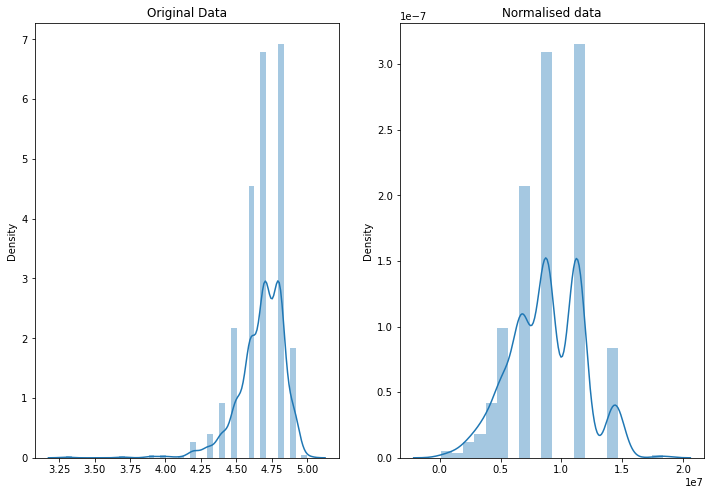

In [17]:
# Normalise the exponential data with boxcox
normalised_data = stats.boxcox(coursera_data['course_rating'])

# Plot both together to compare
fig, ax=plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [12.00, 8.00]
sns.distplot(coursera_data['course_rating'], ax=ax[0])
ax[0].set_title("Original Data")
ax[0].grid(False)
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(normalised_data[0], ax=ax[1])
ax[1].set_title("Normalised data");
ax[1].grid(False)

<p> In below cell we see the scaling of coursera 'course_students_enrolled' numeric data. </p>
<p> In the below output cell (left) we see the original coursera data while on the right it is scaled data for 'course_students_enrolled' values. </p>

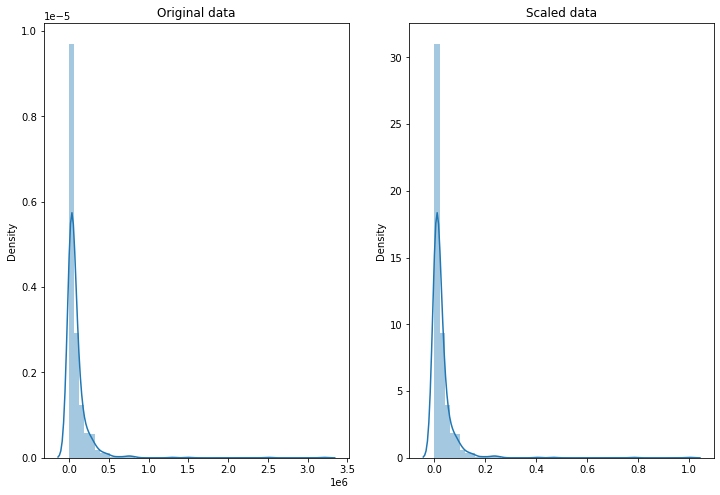

In [18]:
# Min-max scale the data between 0 and 1
scaled_data = minmax_scaling(coursera_data['course_students_enrolled'], columns=[0])

# Plot both together to compare
fig, ax = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [12.00, 8.00]
sns.distplot(coursera_data['course_students_enrolled'], ax=ax[0])
ax[0].set_title("Original data")
ax[0].grid(False)
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
ax[1].set(ylabel='Density');
ax[1].grid(False)

<p> In below cell we see the normalisation of coursera 'course_students_enrolled' numeric data. </p>
<p> In the below output cell (left) we see the original coursera data while on the right it is normalised data for 'course_students_enrolled' values. </p>

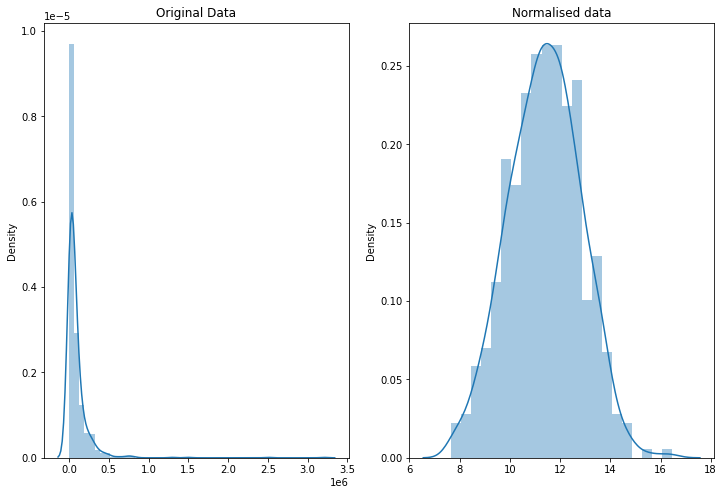

In [19]:
# Normalise the exponential data with boxcox
normalised_data = stats.boxcox(coursera_data['course_students_enrolled'])

# Plot both together to compare
fig, ax=plt.subplots(1,2)
plt.rcParams["figure.figsize"] = [12.00, 8.00]
sns.distplot(coursera_data['course_students_enrolled'], ax=ax[0])
ax[0].set_title("Original Data")
ax[0].grid(False)
ax[0].set(xlabel = '', ylabel='Density')
sns.distplot(normalised_data[0], ax=ax[1])
ax[1].set_title("Normalised data");
ax[1].grid(False)

<em> From original data we see that course ratings vary from 3.5 to 5 and students enrollment vary from 0 to above 3 million while from scaled data the values are given from 0 to 1 and from normalisation it gives values as a normal distribution from 0 to 2 and from 6 to 18. </em>

### Which of the features are numeric?
<p> In the cell below we are defining all columns and implementing function (_get_numeric_data()) to find numeric features. </p>  
<p> In the output cell we are getting these numeric features: 'course_rating', 'course_students_enrolled'. </p> 

In [20]:
cols = coursera_data.columns
num_cols = coursera_data._get_numeric_data().columns
num_cols

# coursera_data.info()

Index(['course_rating', 'course_students_enrolled'], dtype='object')

### Which features are categorical?
<p> In the cell below we are substracting numeric features from all columns, so in the output we get categorical features: 'course_Certificate_type', 'course_difficulty', 'course_organization', 'course_title'. </p> 

In [21]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

# coursera_data.dtypes.value_counts()

['course_title',
 'course_difficulty',
 'course_Certificate_type',
 'course_organization']

<em> All categorical features will come in handy when visualizing the data. </em>

### Treating the outliers
<p> In the below two cells we are writing commands to treat the outliers and plotting them. The dots in the graphs below show the outliers. </p>
<p> In the first output cell an outlier range from 3.25 to 5. </p>
<p> In the second output cell an outlier range from 0 to 1 million. </p>


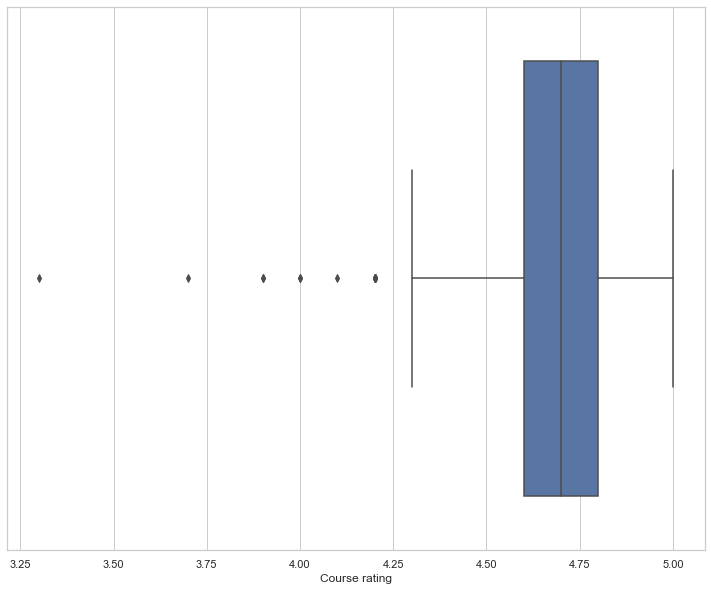

In [22]:
# Setting the dimensions and overwriting the default background value

sns.set(rc={'figure.figsize':(12.5,10.0)})
sns.set_theme(style="whitegrid")

# Selecting boxplot for visualization and setting x label 

sns.boxplot(x=coursera_data['course_rating']);
plt.xlabel('Course rating');

# Expected result: outlier identifications between 3.25 and 5

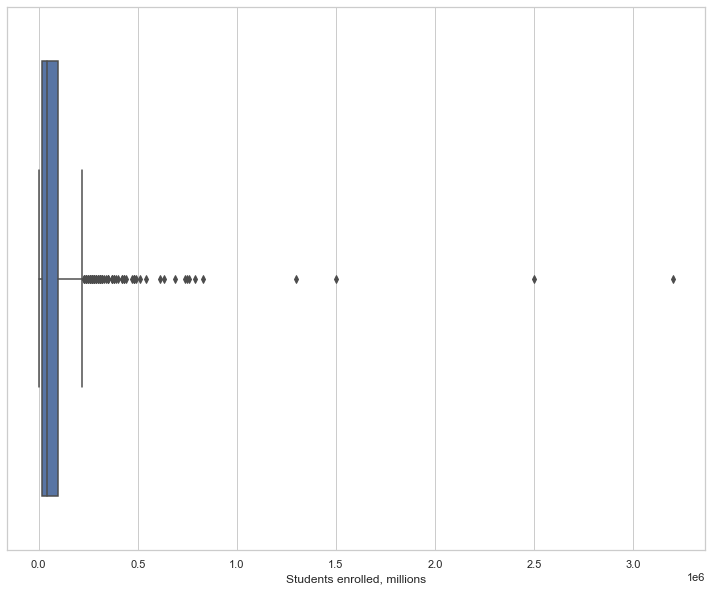

In [23]:
# Setting the dimensions and overwriting the default background value

sns.set(rc={'figure.figsize':(12.5,10.0)})
sns.set_theme(style="whitegrid")

# Selecting boxplot for visualization and setting x label 

sns.boxplot(x=coursera_data["course_students_enrolled"]);
plt.xlabel('Students enrolled, millions');

# Expected result: outlier identifications from 0 to above 3 million (3)

<em> From outlier identification we see that mean of ratings are high with not so huge outliers, while the mean count of students enrolled are between zero and 100000 with outlier beyond 1 million of student enrolled. </em>

### Statistics of numeric features
Investigating standard deviations, means, minimum value, maximum value, counts and percentiles of numeric features.

In [24]:
coursera_data.describe()

course_rating  course_students_enrolled
count     891.000000              8.910000e+02
mean        4.677329              9.055208e+04
std         0.162225              1.819365e+05
min         3.300000              1.500000e+03
25%         4.600000              1.750000e+04
50%         4.700000              4.200000e+04
75%         4.800000              9.950000e+04
max         5.000000              3.200000e+06

# Exploratory Data Analysis

<p> From here on out we perform EDA on coursera data. </p>

### Which organisation has the most number of courses?

Herein we check two things:
* First, which organisation has the most number of courses on Coursera. 
* Next, which organisations have more than 10 courses on Coursera.

<p> This is an analysis to show which organisations dominate on Coursera with function written to help determine them. </p>

In [25]:
def find_organisation_greater_than_ten(data: pd.DataFrame) -> pd.DataFrame:
    """A function that takes a dataframe of coursera's course_organisation feature and
        returns a dataframe with number of courses more than 10"""
    dict = {}
    course_org = coursera_data['course_organization'].to_list()
    # Implementing count for each course in an organisation
    for org in course_org:
        if org in dict:
            dict[org] += 1
        else:
            dict[org] = 1
    orgs = []
    counts = []
    # Analysing dictionary with values higher than 10 and printing out keys and values
    for key, value in dict.items():
        if value > 10:
            orgs.append(key)
            counts.append(value)
        else:
            continue
    # Returning a new assignement
    course_organisation_greater_than_10 = pd.DataFrame({'course_organization':orgs, 'count':counts})
    course_organisation_greater_than_10.sort_values(by='count', ascending=False, inplace=True)
    return course_organisation_greater_than_10

In the below output cell we print out the counts of organisations of courses of more than 10 to their belt

In [26]:
find_organisation_greater_than_ten(coursera_data)

course_organization  count
0                   University of Pennsylvania     59
8                       University of Michigan     41
11                                Google Cloud     34
1                     Johns Hopkins University     28
12                             Duke University     28
6             University of California, Irvine     27
4                                          IBM     22
7   University of Illinois at Urbana-Champaign     22
16             University of California, Davis     21
13                      University of Virginia     19
10              University of Colorado Boulder     19
2                              Yale University     17
3                              deeplearning.ai     16
14                         Stanford University     16
9      Universidad Nacional Autónoma de México     14
20                    Berklee College of Music     14
15               University of Colorado System     13
18                             Rice University     13
5                        University of Toronto     11
17                       University of Alberta     11
19                     University of Minnesota     11

## Visualizing the data

***The beginning of visualizations***
<p> First barh chart shows the organisations with more than 10 courses on Coursera. </p>

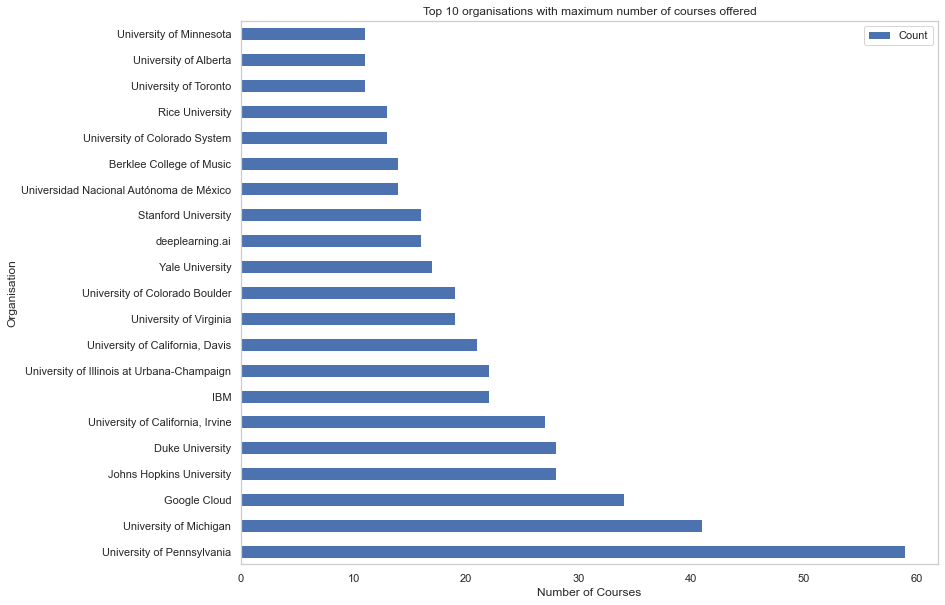

In [27]:
# Assignement and plotting a barh chart

course_organisation_greater_than_10 = find_organisation_greater_than_ten(coursera_data)
course_organisation_greater_than_10.plot.barh(x='course_organization', y='count')
plt.rcParams['axes.facecolor'] = 'white'
plt.title('Top 10 organisations with maximum number of courses offered')
plt.xlabel('Number of Courses')
plt.grid(False)
plt.ylabel('Organisation')
plt.legend(['Count'], loc='upper right')
plt.show()

<p> The below pie chart shows the organisations that have more than 10 courses on Coursera as a nicer representation from above barh chart. </p>
<p> When you press on a pie panel chart you get the 'Organisation' and 'Amount of courses'.

In [28]:
# An interactive pie chart

fig = px.pie(coursera_data.course_organization.value_counts().reset_index().head(20),
       values='course_organization',names='index',
       labels={'course_organization':'Amount of courses', 'index':'Organisation'})
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.update_layout(title_text='Top 20 course organisations', title_x=0.25)
fig.show()

<em> University of Pennsylvania dominates with a bit shy of 60 courses, followed by University of Michigan who has just over 40 courses on Coursera!</em>

### Looking at the average course rating of the organisations with more than 10 courses
<p> We investigate whether these organisations produce quality courses or is it just quantity over quality? </p>
<p> In the below cell we make a new assignement that rounds an average of course organisations grouped by course rating to dictionary as an output. </p>




In [29]:
dominant_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()

<p> In the below cell we first filter out the organisations, as we only want those organisations with more than 10 courses, </p>
<p> Second we define a list and calculate a for loop for dictionary containing organisation as key and avg rating as value. </p>
<p> Third we make an assignment to previously created dataframe and add a new feature ('avg_rating'). </p>

In [30]:
orgs = course_organisation_greater_than_10['course_organization'].to_list()
avg_rating = []
for org in orgs:
    for key, value in dominant_dict.items():
        if key == org:
            avg_rating.append(value)
        else:
            continue
course_organisation_greater_than_10['avg_rating'] = avg_rating

In the below cell printing out the average rating of courses with more than 10 courses from an updated dataframe.

In [31]:
course_organisation_greater_than_10

# course_organisation_greater_than_10.groupby(['course_organization'])['avg_rating'].aggregate('max').sort_values(ascending=False)

course_organization  count  avg_rating
0                   University of Pennsylvania     59         4.7
8                       University of Michigan     41         4.7
11                                Google Cloud     34         4.6
1                     Johns Hopkins University     28         4.7
12                             Duke University     28         4.7
6             University of California, Irvine     27         4.6
4                                          IBM     22         4.6
7   University of Illinois at Urbana-Champaign     22         4.7
16             University of California, Davis     21         4.6
13                      University of Virginia     19         4.7
10              University of Colorado Boulder     19         4.7
2                              Yale University     17         4.8
3                              deeplearning.ai     16         4.7
14                         Stanford University     16         4.8
9      Universidad Nacional Autónoma de México     14         4.8
20                    Berklee College of Music     14         4.8
15               University of Colorado System     13         4.7
18                             Rice University     13         4.7
5                        University of Toronto     11         4.6
17                       University of Alberta     11         4.7
19                     University of Minnesota     11         4.6

Plotting a barh chart of organisations with more than 10 courses under its belt with average course ratings 



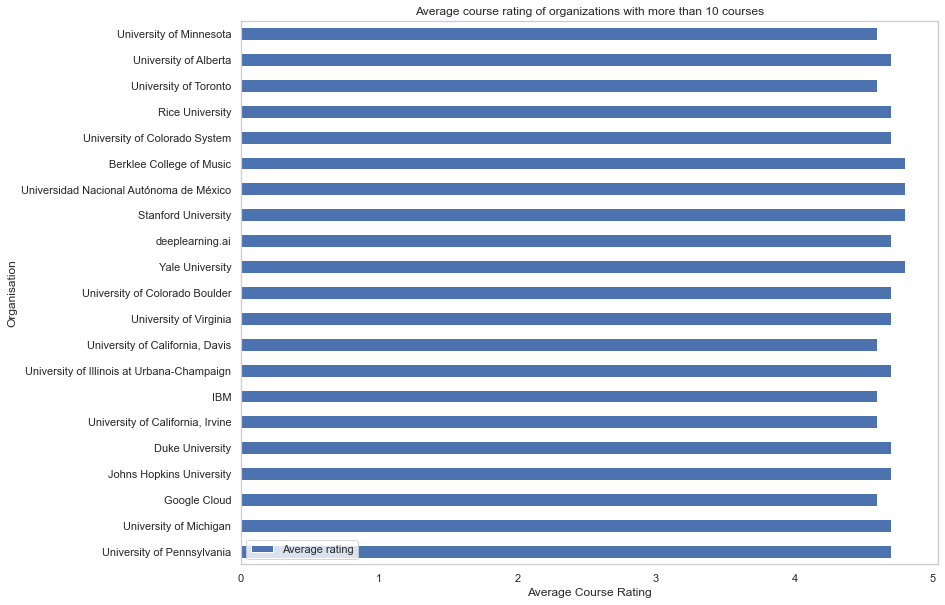

In [32]:
# Plotting a barh chart

course_organisation_greater_than_10.plot(kind='barh', x='course_organization', y='avg_rating')
plt.title('Average course rating of organizations with more than 10 courses')
plt.xlabel('Average Course Rating')
plt.ylabel('Organisation')
plt.grid(False)
plt.legend(['Average rating'], loc='lower left')
plt.show()

<em> As we see there is very little difference between the average course rating of all these organisations. Hence, they don't focus on just quantity. </em>

### Which organisation has the highest course rating?

<p> Creating a dictionary and then printing out the most popular organisations in the two cells below. </p>
<p> In the first cell below we round and make a dictionary of average courses while grouping all organisations by course ratings. Then applying a dictionary comprehension with lambda function and printing the result. </p>
<p> In the second cell below we loop over dictionary items to find out the most popular organisations based on course ratings. </p>

In [33]:
dominant_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()
dominant_dict = {k: v for k, v in sorted(dominant_dict.items(), key=lambda item: item[1], reverse=True)}
dominant_dict

{'Crece con Google': 4.9,
 'Google - Spectrum Sharing': 4.9,
 'Hebrew University of Jerusalem': 4.9,
 'London Business School': 4.9,
 'Nanyang Technological University, Singapore': 4.9,
 'ScrumTrek': 4.9,
 'Universidade Estadual de Campinas': 4.9,
 'Universidade de São Paulo': 4.9,
 'American Museum of Natural History': 4.8,
 'Arizona State University': 4.8,
 'Atlassian': 4.8,
 'Autodesk': 4.8,
 'BCG': 4.8,
 'Berklee College of Music': 4.8,
 'Cloudera': 4.8,
 'Columbia University': 4.8,
 'ESADE Business and Law School': 4.8,
 'Eindhoven University of Technology': 4.8,
 'Institute for the Future': 4.8,
 'Kalshoven-Gieskes Forum': 4.8,
 'Ludwig-Maximilians-Universität München (LMU)': 4.8,
 'Macquarie University': 4.8,
 'McMaster University': 4.8,
 'Osmosis': 4.8,
 'Peking University': 4.8,
 'Relay Graduate School of Education': 4.8,
 'SAS': 4.8,
 'Shanghai Jiao Tong University': 4.8,
 'Stanford University': 4.8,
 'Tel Aviv University': 4.8,
 'The George Washington University': 4.8,
 'The

In [34]:
for key, value in dominant_dict.items():
    if value == 4.9:
        print(key)

Crece con Google
Google - Spectrum Sharing
Hebrew University of Jerusalem
London Business School
Nanyang Technological University, Singapore
ScrumTrek
Universidade Estadual de Campinas
Universidade de São Paulo


<em> As we see none of these organisations belong to the group who have more than 10 courses. </em>

### Number of courses with different ratings

<p> In the below cell we plot a countplot to see the count of courses versus different course ratings </p>

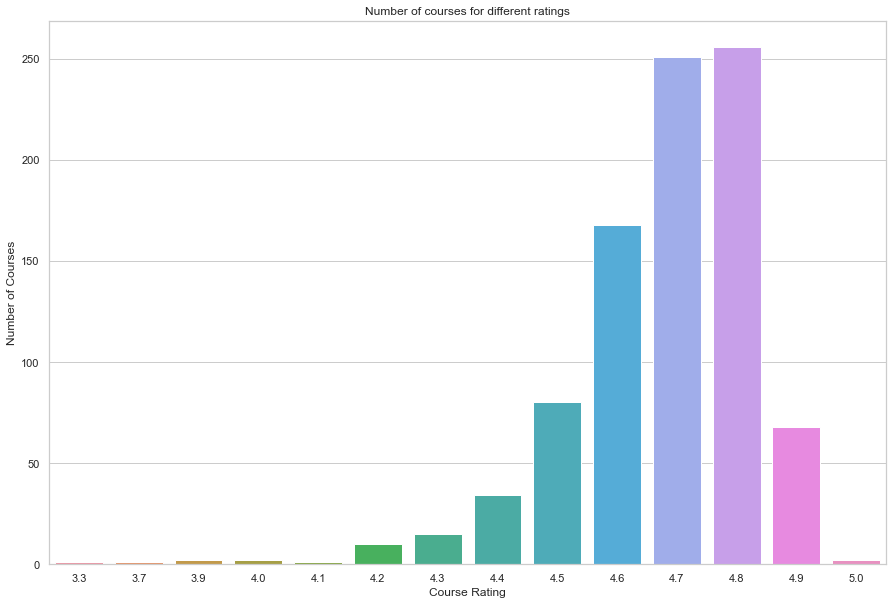

In [35]:
# Plotting a countplot

plt.figure(figsize=(15,10)) 
sns.countplot(x='course_rating', data=coursera_data)
sns.set_style("whitegrid")
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('Number of courses for different ratings');

### All courses on Coursera & most popular
<p> Let's look at all the courses with respect to their ratings (first output cell) where we group courses by ratings and return values in descending order. </p>
<p> In the first cell below we round and make a dictionary of courses while grouping all courses by course ratings. Then apply a dictionary comprehension with lambda function and print all the courses. </p>
<p> In the second cell below we print out the top 10 courses on Coursera by course rating. </p>

In [36]:
course_dict = coursera_data.groupby('course_title')['course_rating'].mean().to_dict()
course_dict = {k: v for k, v in sorted(course_dict.items(), key=lambda item: item[1], reverse=True)}
course_dict

{'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho': 5.0,
 'Infectious Disease Modelling': 5.0,
 'Agile и Scrum в работе над проектами и продуктами': 4.9,
 'American Contract Law I': 4.9,
 'Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn)': 4.9,
 'Arizona State University TESOL': 4.9,
 'Aspectos básicos de la planificación y la gestión de proyectos': 4.9,
 'Become a CBRS Certified Professional Installer by Google': 4.9,
 'Boosting Creativity for Innovation': 4.9,
 'Brand Management: Aligning Business, Brand and Behaviour': 4.9,
 'Bugs 101: Insect-Human Interactions': 4.9,
 'Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course)': 4.9,
 'COVID-19 Contact Tracing': 4.9,
 'Compassionate Leadership Through Service Learning with Jane Goodall and Roots & Shoots': 4.9,
 'Convolutional Neural Networks': 4.9,
 'Discrete Optimization': 4.9,
 'Diseño y Creación d

In [37]:
courses_df = pd.DataFrame({'course_title':list(course_dict.keys()), 'course_rating':list(course_dict.values())})
courses_df[:10]

course_title  course_rating
0  El Abogado del Futuro: Legaltech y la Transfor...            5.0
1                       Infectious Disease Modelling            5.0
2  Agile и Scrum в работе над проектами и продуктами            4.9
3                            American Contract Law I            4.9
4  Aprendiendo a aprender: Poderosas herramientas...            4.9
5                     Arizona State University TESOL            4.9
6  Aspectos básicos de la planificación y la gest...            4.9
7  Become a CBRS Certified Professional Installer...            4.9
8                 Boosting Creativity for Innovation            4.9
9  Brand Management: Aligning Business, Brand and...            4.9

### Coursera courses against students

#### Does the course difficulty affect number of students enrolled?
<p> For the following analysis we will check the total and average number of students enrolled while grouping by course difficulties. </p>
<p> In the below cell we assign and find the total number of students enrolled for each course with respect to course difficulties. </p>

In [38]:
df = pd.DataFrame({'total_students_enrolled' : coursera_data.groupby('course_difficulty').sum()['course_students_enrolled']}).reset_index()

In [39]:
# Printing out total student

df

course_difficulty  total_students_enrolled
0          Advanced                1264400.0
1          Beginner               39921800.0
2      Intermediate               14506300.0
3             Mixed               24989400.0

<p> In the cell below we plot the pie chart of all students with respect to the course difficulties. </p>

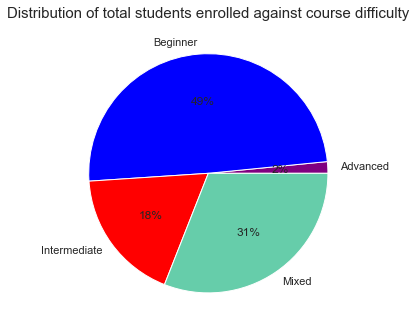

In [40]:
# Plotting a pie chart

my_colors = ['purple','blue','red','mediumaquamarine']
fig, ax = plt.subplots(figsize=(8, 5.5))
ax.pie(df['total_students_enrolled'],labels=df['course_difficulty'],autopct='%1.0f%%',shadow = False, colors=my_colors);
ax.set_title('Distribution of total students enrolled against course difficulty', fontsize=15);

<em> Total students enrolled are in the beginner level courses (49%) followed by mixed level (31%), then intermediate (18%) and a small portion of students are enrolled in advanced level courses (2%). </em>

<p> Below is an interactive sunburst plot that shows all courses with repective 'Course difficulty' of 'Organisation' with 'Difficulty/Organisation' and sum all course ratings of an organisation as 'Course rating' which are grouped by their difficulties. </p>

In [41]:
# Plotting an interactive sunburst plot of all courses aligned with the course difficulty

fig = px.sunburst(coursera_data, path=['course_difficulty', 'course_organization'],values='course_rating',
                 labels={
                     'parent': 'Course difficulty',
                     'labels': 'Organisation',
                     'id': 'Difficulty/Organisation',
                     'course_rating': 'Course rating'
                 })
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.show()

<em> Total students enrolled are in the beginner level courses followed by mixed level, then intermediate and advanced level courses  with the pie chart above showing all these courses. </em>

<p> Below we find the average of total students enrolled for each course difficulty. </p>
<p> In the cell below we round and make a dictionary of average student count while grouping all course difficulties by students enrolled. Then applying a dictionary comprehension with lambda function and printing the result. </p>
<p> Expected result is {'Mixed': 133633.0, 'Beginner': 81975.0, 'Intermediate': 73264.0, 'Advanced': 66547.0}. </p>

In [42]:
average_student_dict = round(coursera_data.groupby('course_difficulty')['course_students_enrolled'].mean(), 0).to_dict()
average_student_dict = {k: v for k, v in sorted(average_student_dict.items(), key=lambda item: item[1], reverse=True)}
average_student_dict

{'Mixed': 133633.0,
 'Beginner': 81975.0,
 'Intermediate': 73264.0,
 'Advanced': 66547.0}

<p> In the below cell we create a dataframe of average students and print the results. </p>

In [43]:
average_students = pd.DataFrame({'difficulty':list(average_student_dict.keys()), 'avg_students':list(average_student_dict.values())})
average_students

difficulty  avg_students
0         Mixed      133633.0
1      Beginner       81975.0
2  Intermediate       73264.0
3      Advanced       66547.0

<p> In the below cell we plot the average students dataframe as a bar plot where each difficulty is represented as the average number of students taking it. </p> 

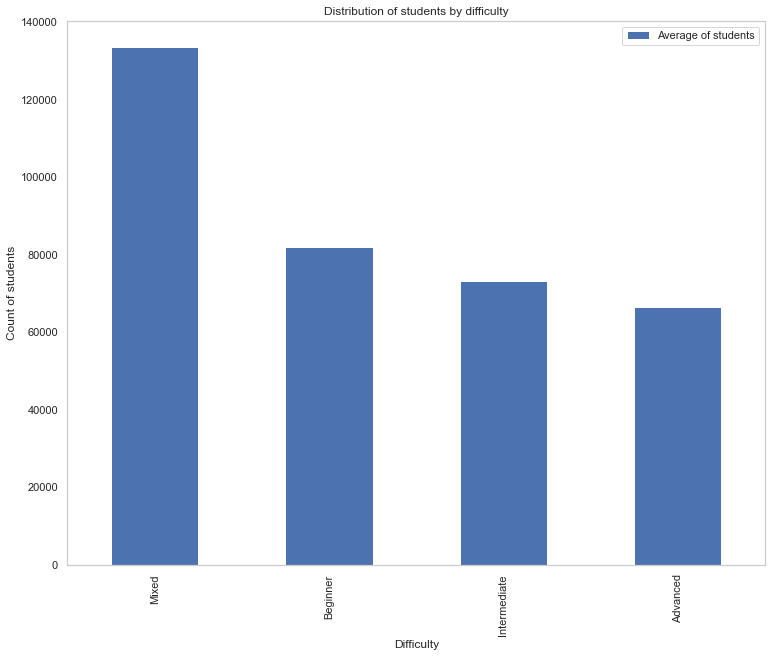

In [44]:
# Plotting bar chart

average_students.plot(kind='bar', x='difficulty', y='avg_students', title='Distribution by difficulty')
plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.title('Distribution of students by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count of students')
plt.grid(False)
plt.legend(['Average of students'], loc='upper right')
plt.show()

<em> There are more number of students enrolled per mixed difficulty level course rather than beginner or any other. </em>

# Does the course difficulty affect the course rating?
<p> Do courses with advanced level of difficulty get lower rating? Is there any relation between the two? </p>
<p> Below cell groups the course difficulties by course ratings and takes the mean.</p>
<p> In the below cell we round and make a dictionary of average course rating while grouping all course difficulties by ratings. Then applying a dictionary comprehension with lambda function and printing the result. </p>
<p> Expected result is {'Beginner': 4.7, 'Mixed': 4.7, 'Advanced': 4.6, 'Intermediate': 4.6}. </p>

In [45]:
rate_dict = round(coursera_data.groupby('course_difficulty')['course_rating'].mean(), 1).to_dict()
rate_dict = {k: v for k, v in sorted(rate_dict.items(), key=lambda item: item[1], reverse=True)}
rate_dict

{'Beginner': 4.7, 'Mixed': 4.7, 'Advanced': 4.6, 'Intermediate': 4.6}

<p> Below cell makes a new assignment and plots the bar plot where each course difficulty is represented 
by the average ratings of all coursera courses to look at an average rating by course difficulties. </p>

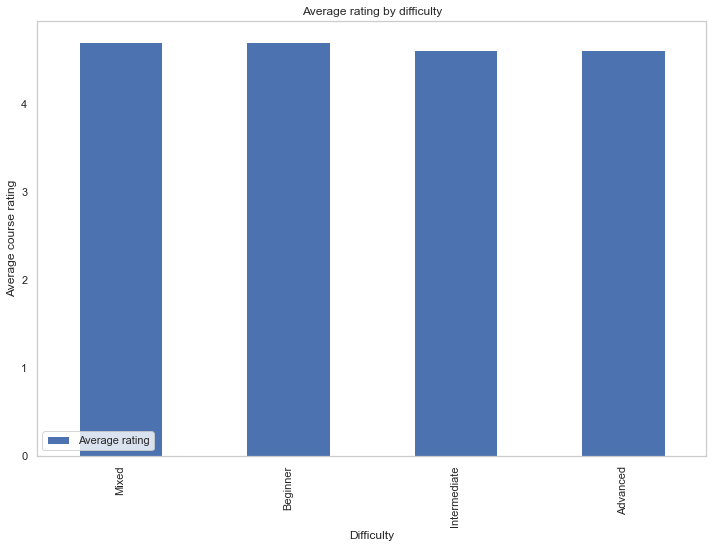

In [46]:
# Ploting a bar plot to look at an average rating by course difficulties

average_students['avg_rating'] = list(rate_dict.values())
average_students.plot(kind='bar', x='difficulty', y='avg_rating', title='Average rating by difficulty')
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.title('Average rating by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Average course rating')
plt.grid(False)
plt.legend(['Average rating'], loc='lower left')
plt.show();

<em> Nope, very little difference in the ratings. </em>

# Does certificate type impact number of students enrolled?
<p> This could be a very important question for Coursera and for the organisations who are making courses. </p>
<p> What type of certificate should be there for the maximum student enrollment and how should Coursera optimize the course recommendations based on the type of certificates? </p>
<p> In the cell below we round and make a dictionary of average students enrolled in a course while grouping all course certification types by the students enrolled in the courses. Then apply a dictionary comprehension with lambda function and print the results. </p>
<p> Expected result is {'PROFESSIONAL CERTIFICATE': 190700.0, 'SPECIALIZATION': 91792.0, 'COURSE': 87854.0} </p>



In [47]:
certificate_dict = round(coursera_data.groupby('course_Certificate_type')['course_students_enrolled'].mean(), 0).to_dict()
certificate_dict = {k: v for k, v in sorted(certificate_dict.items(), key=lambda item: item[1], reverse=True)}
certificate_dict

{'PROFESSIONAL CERTIFICATE': 190700.0,
 'SPECIALIZATION': 91792.0,
 'COURSE': 87854.0}

<p> Below we make a new assignment and plot the bar plot where each course certificate type is represented by the count of average students. </p>

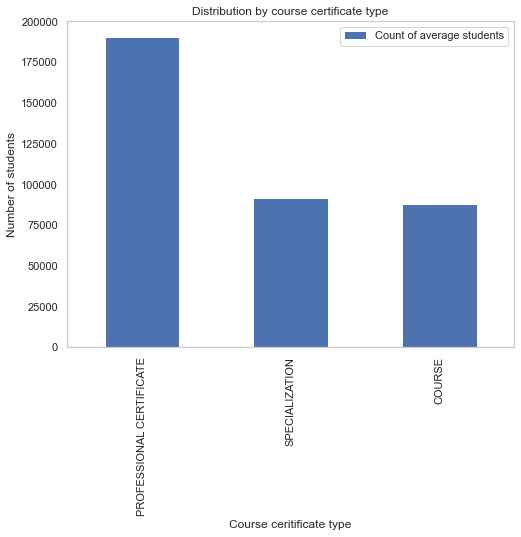

In [48]:
certificate_df = pd.DataFrame({'course_Certificate_type':list(certificate_dict.keys()), 'avg_students':list(certificate_dict.values())})
certificate_df.plot(kind='bar', x='course_Certificate_type', y='avg_students', title='Distribution of students by course certificate type')
plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.title('Distribution by course certificate type')
plt.xlabel('Course ceritificate type')
plt.ylabel('Number of students')
plt.grid(False)
plt.legend(['Count of average students'], loc='upper right')
plt.show();

<em> Yes! More number of students on an average enroll in Professional Certificate courses followed by a specialization. </em>

# Does certificate type impact course rating?
<p> Do professional certificates have a higher rating because they are accepted everywhere or is there still no impact? </p>
<p> Below cell rounds and makes a dictionary of average students enrolled in a course while grouping all course certification types by the course ratings. Then apply a dictionary comprehension with lambda function and print the results. </p> 
<p> Expected result is {'COURSE': 4.7, 'PROFESSIONAL CERTIFICATE': 4.7, 'SPECIALIZATION': 4.6} </p>



In [49]:
rate_cert_dict = round(coursera_data.groupby('course_Certificate_type')['course_rating'].mean(), 1).to_dict()
rate_cert_dict = {k: v for k, v in sorted(rate_cert_dict.items(), key=lambda item: item[1], reverse=True)}
rate_cert_dict

{'COURSE': 4.7, 'PROFESSIONAL CERTIFICATE': 4.7, 'SPECIALIZATION': 4.6}

<p> In the below cell we make a new assignment of average rating and plot the bar plot where each course certificate type is represented by the average rating of all the courses in a respective type. </p>



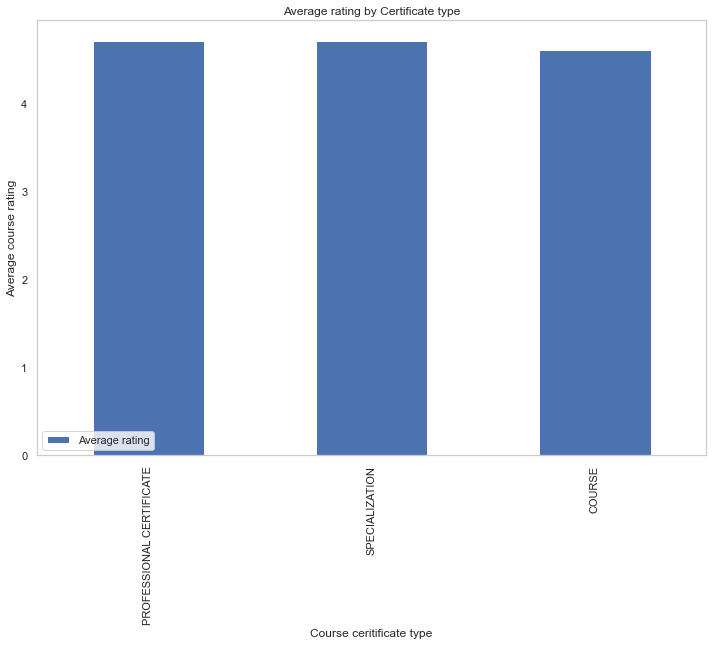

In [50]:
# Plotting the bar chart

certificate_df['avg_rating'] = list(rate_cert_dict.values())
certificate_df.plot(kind='bar', x='course_Certificate_type', y='avg_rating', title='Average rating by Certificate type')
sns.set(font_scale = 1)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = [12.00, 8.00]
plt.xlabel('Course ceritificate type')
plt.ylabel('Average course rating')
plt.grid(False)
plt.legend(['Average rating'], loc='lower left')
plt.show();

<em> Still, no difference. </em>

### Top professional certificates

<p> Herein we will look into the most popular professional certificates from a total students taking professional certificates courses. </p>
<p> In the below cell we make a new assignment for coursera data with masks and plotting an interactive pie plot, which specifies which professional certificates were the most popular by which institution among students. When you press on a pie panel chart you get 'Students enrolled' and 'Organisation' with course title. </p>

In [51]:
professional=coursera_data[(coursera_data.course_rating>4.6) & (coursera_data.course_students_enrolled>200.0) 
                   & (coursera_data.course_Certificate_type=='PROFESSIONAL CERTIFICATE')]
fig = px.pie(professional,values='course_students_enrolled', names='course_title',
#        hover_data=['course_organization'],
       hover_data=['course_organization'],
       labels={
                     'course_students_enrolled': 'Students enrolled',
                     'course_organization': 'Organisation',
                     'course_title': 'Course title',
                 })
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.update_layout(title_text='Distribution of professional certificates', title_x=0.5)
fig.show()

<em> Most popular professional certificates are given by SAS programmer, Google IT Support and Cloud Engineering with Google Cloud that make more than 75% of all professional certificates. </em>


### Top 20 specializations

<p> Below we will look into the most popular specializations from a total students taking specializations. </p>
<p> In the below cell we are making a new assignment for coursera data with masks and plotting an interactive pie plot, which specifies which specializations of which organizations were in top 20 among total students. When you press on a pie panel chart you get 'Students enrolled' and 'Organisation' with the course title. </p>

In [52]:
# Plotting an interactive pie plot.

top_specializations=coursera_data[(coursera_data.course_rating>4.6) & (coursera_data.course_students_enrolled>150000.0) 
                   & (coursera_data.course_Certificate_type=='SPECIALIZATION')]
fig = px.pie(top_specializations[:20],values='course_students_enrolled', names='course_title',
       labels={
                     'course_students_enrolled': 'Students enrolled',
                     'course_organization': 'Organisation',
                     'course_title': 'Course title',
                 },
        hover_data=['course_organization'])
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.update_layout(title_text='Top 20 specializations', title_x=0.5)
fig.show()

<em> Most popular specializations are Python for Everybody, Deep Learning, Improve Your English Communication Skills and Academic English: Writing that make more than 40% of top 20 specializations. </em>

### Top courses
<p> This visualization looks at the top 18 organisations having the most students enrolled into their courses with specifying three masks. </p>
<p> In the below cell we are making a new assignment for coursera data with masks and plotting an interactive pie plot, which specifies which courses have the most students enrolled into them. When you press on a pie panel chart you get 'Course title', 'Students enrolled' and 'Organisation'. </p>

In [53]:
# Plotting an interactive pie plot

top_courses=coursera_data[(coursera_data.course_rating>4.6) & 
                          (coursera_data.course_students_enrolled>300000.0) & 
                          (coursera_data.course_Certificate_type=='COURSE')]
fig = px.pie(top_courses,values='course_students_enrolled', names='course_title',
        labels={
                    'course_students_enrolled': 'Students enrolled',
                    'course_organization': 'Organisation',
                    'course_title': 'Course title',
                 },    
        hover_data=['course_organization'])

fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.update_layout(title_text='Top courses', title_x=0.5)
fig.show()

<em> Most popular Coursera courses with a rating of 4.6 or higher and at least 300000 students enrolled are Machine Learning, The Science of Well-Being, Programming for Everybody (Getting Started with Python) & English for Career Development that make more than 55% of top 18 courses. </em>

### Ten most popular courses  and how many students have enrolled in them?
<p> The following visualization looks at how many students are enrolled in ten most popular courses irrespective of certification types. </p>

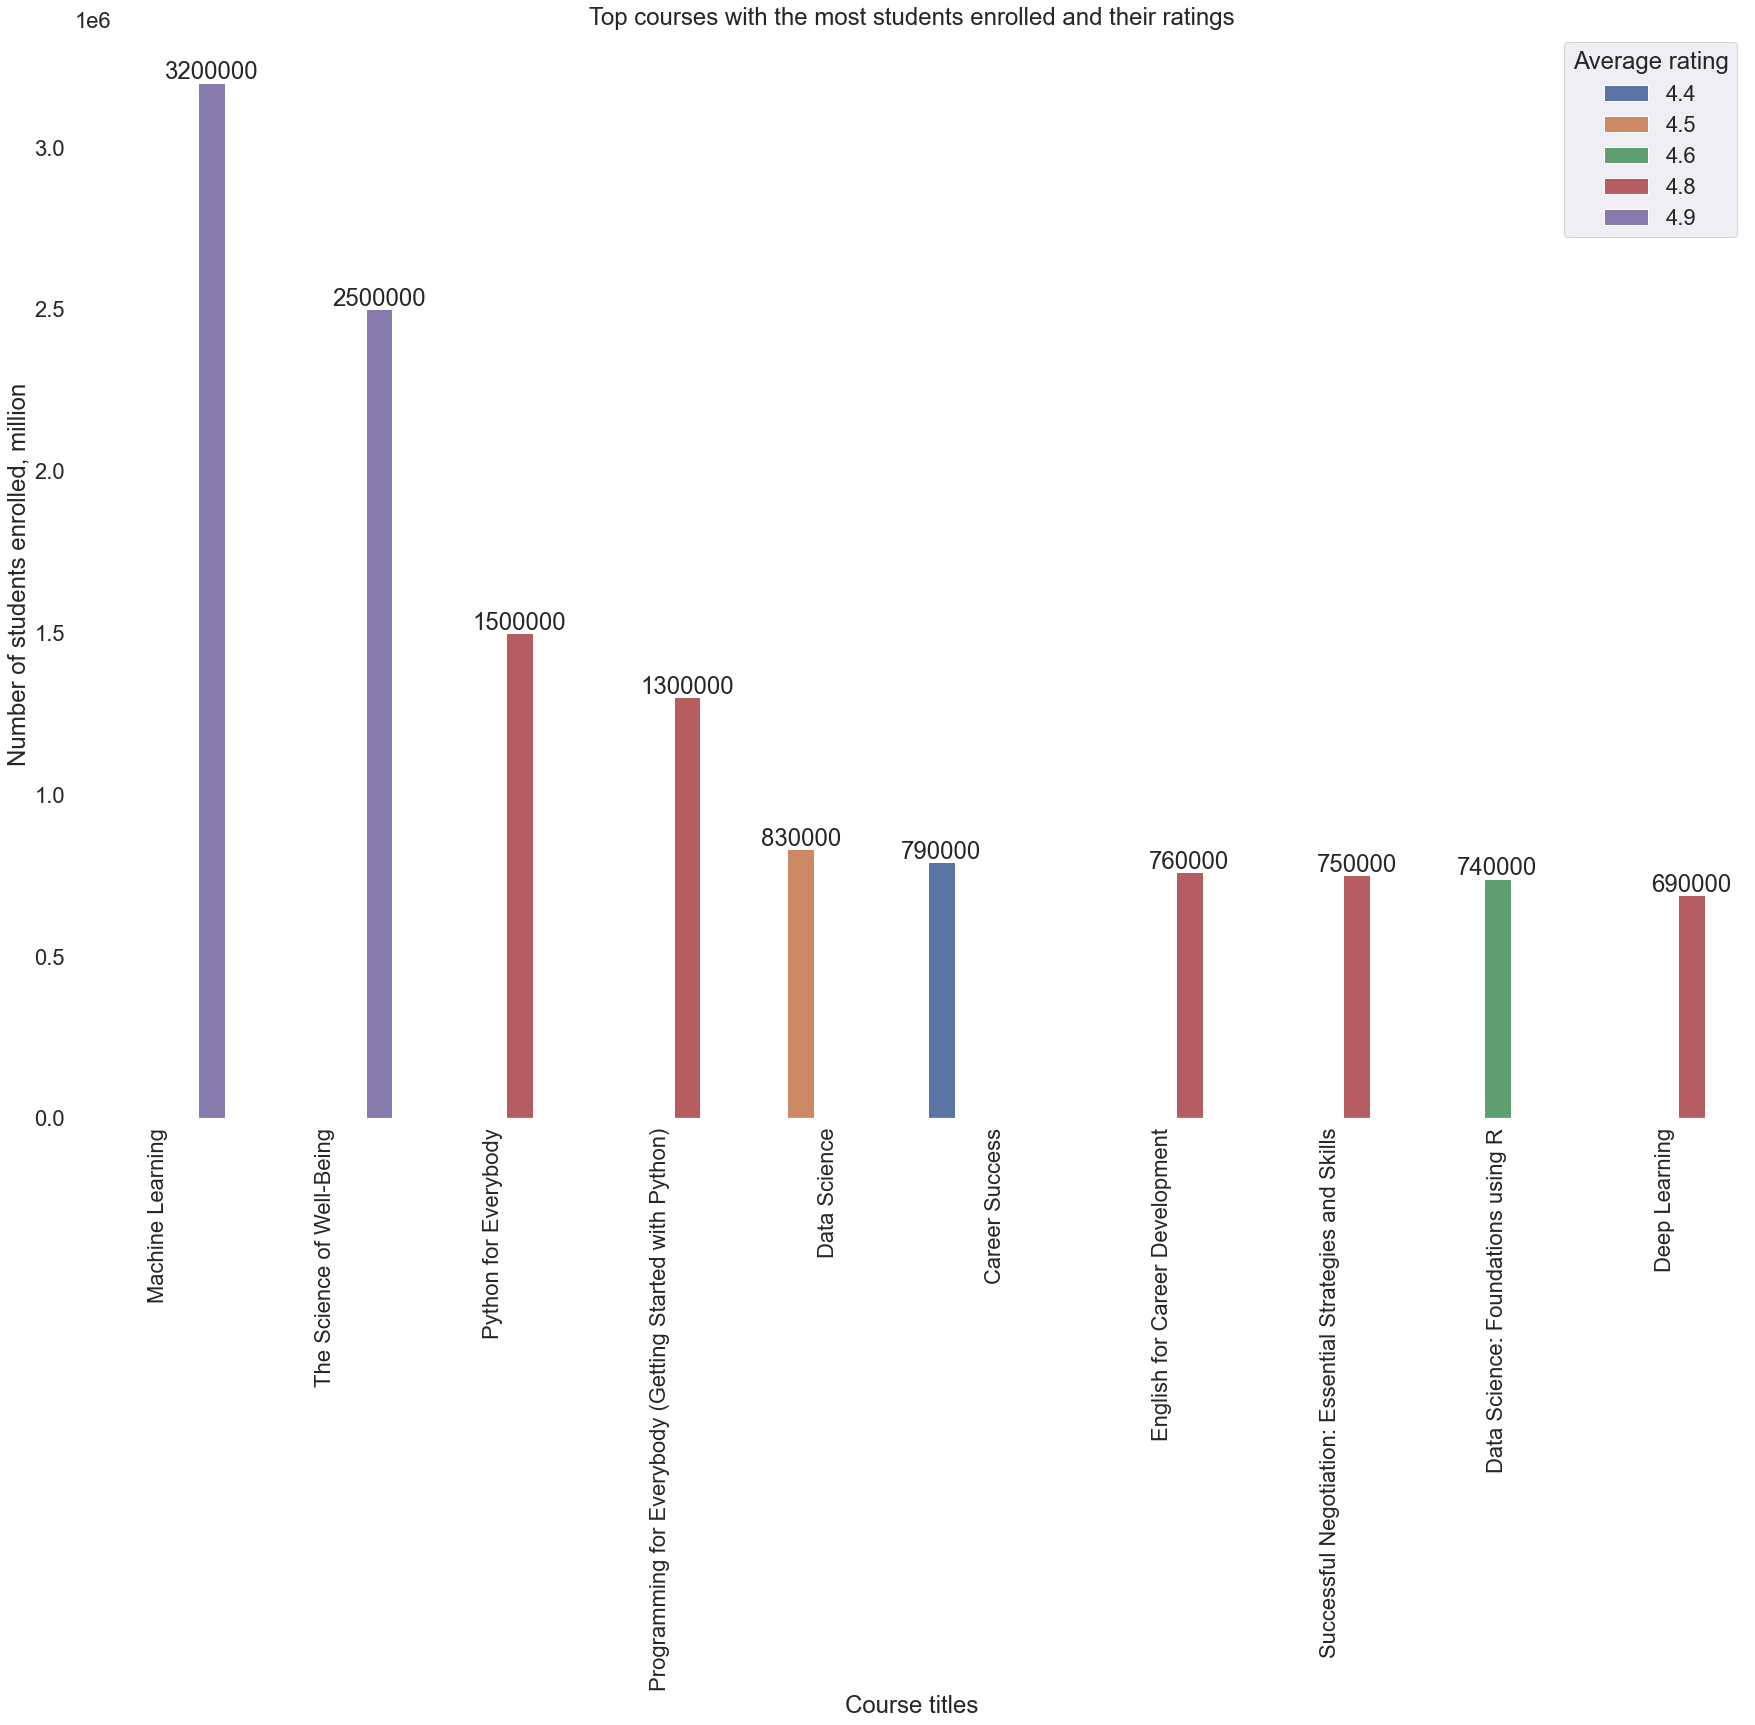

In [55]:
# Assignment of most popular ten courses by student count

ten_most_popular_courses_data=coursera_data.nlargest(10, ['course_students_enrolled'])

# Plotting a barplot of ten most popular courses versus students enrolled with its counts of students shown

plt.figure(figsize=(30,20))
bar_plot = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating",data=ten_most_popular_courses_data)
sns.set_style("whitegrid")
sns.set(font_scale = 2)
bar_plot.legend(loc=1, title='Average rating')
plt.rcParams['axes.facecolor'] = 'white'
plt.xlabel('Course titles')
plt.xticks(rotation=90)
plt.ylabel('Number of students enrolled, million')
plt.title("Top courses with the most students enrolled and their ratings")

# Specifying the integer value above a bar plot of each popular course

for value in bar_plot.patches:  
    bar_plot.annotate(format(value.get_height(), '.0f'), (value.get_x() + value.get_width() / 2., value.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<em> Most popular courses irrespective of certification type according to total students enrolled are Machine Learning, The Science of Well-Being and Python for Everybody with a total of more than 6 million students enrolled while top 10 courses contain more than 11 million students enrolled in general. </em>

# Number of students enrolled vs. Course rating
<p> If there is a large number of students enrolled in the course, does that impact the course rating? </p>
<p> In the below cell we are plotting a scatter plot of students enrolled versus course ratings. </p>



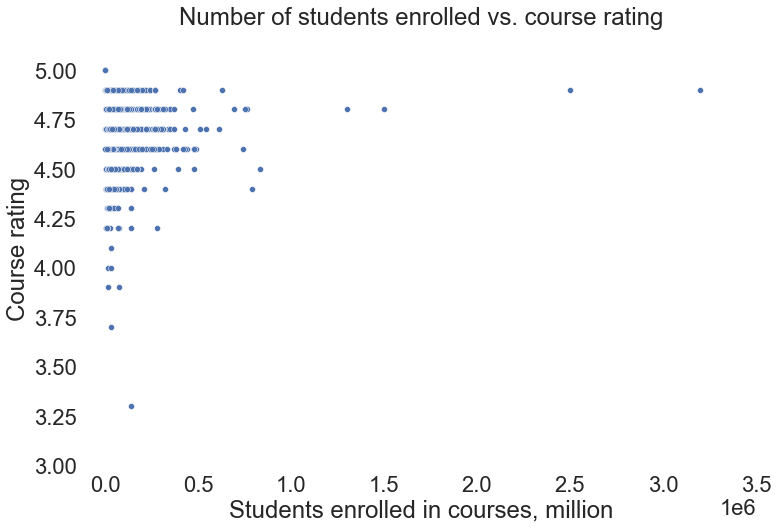

In [56]:
# Plotting a scatter plot 

scatter = sns.scatterplot(data=coursera_data, 
                x="course_students_enrolled", y="course_rating").set(
                title='Number of students enrolled vs. course rating')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = [20.00, 15.00]
plt.ylabel('Course rating')
plt.xlabel('Students enrolled in courses, million')
plt.ylim(3, 5.2)
plt.xlim(-100000, 3500000)
plt.show(scatter)

<em> There is a small datapoint at the bottom which says that less number of students meaning low rating, but this does not prove our assumption as there is no strong relation. We can check how strong is the relation by finding correlation between the two. </em>

## Checking correlation of data

To see the correlation between two numeric features below we do correlation analysis.

In [57]:
coursera_data.corr()

course_rating  course_students_enrolled
course_rating                   1.00000                   0.07109
course_students_enrolled        0.07109                   1.00000

<p> In the below cell we plot correlation heatmap between two numeric features (course_rating and course_students_enrolled). </p>

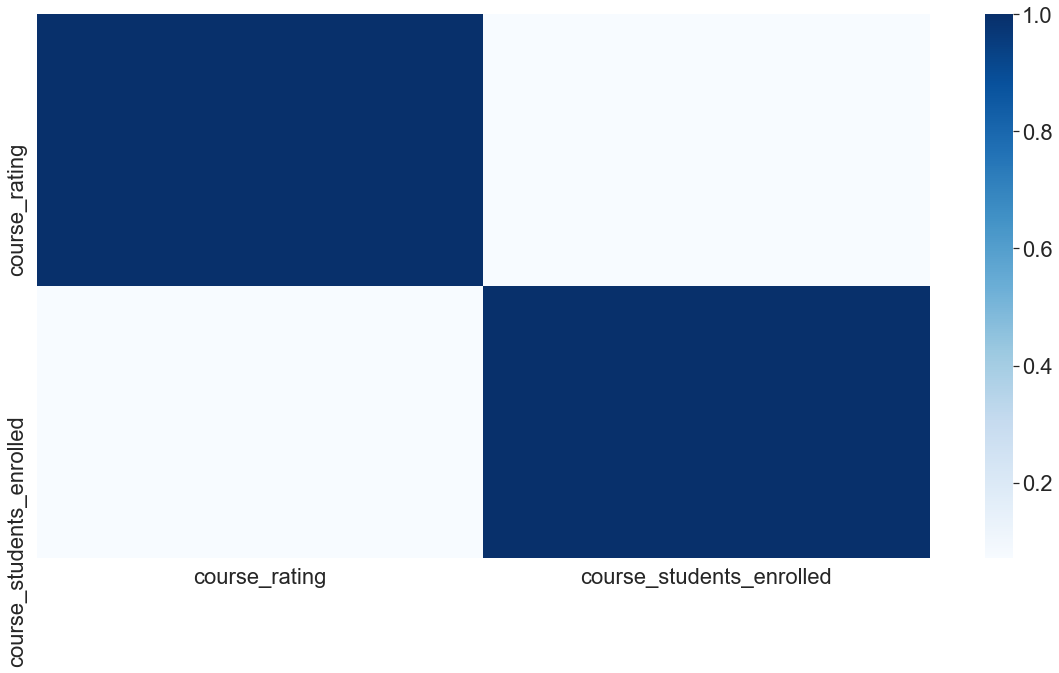

In [58]:
# Plotting heatmap

plt.figure(figsize=(20,10))
sns.heatmap(coursera_data.corr(),cmap='Blues',annot=False);

<em> We see that there is no correlation between two numeric features, hence it's not enough to prove our assumption that more number of students enrolled in the course does lead to a higher rating. </em>

## Course distributions
<p> Now we will check the difficulty & certification types versus counts of courses and will look what words attract a user to enroll in the course. </p>

<p> In the below cell we plot a countplot to look how many courses there are on the respective course difficulties. In other word we are plotting the countplot where each course difficulty type is represented by the total number of courses. </p> 

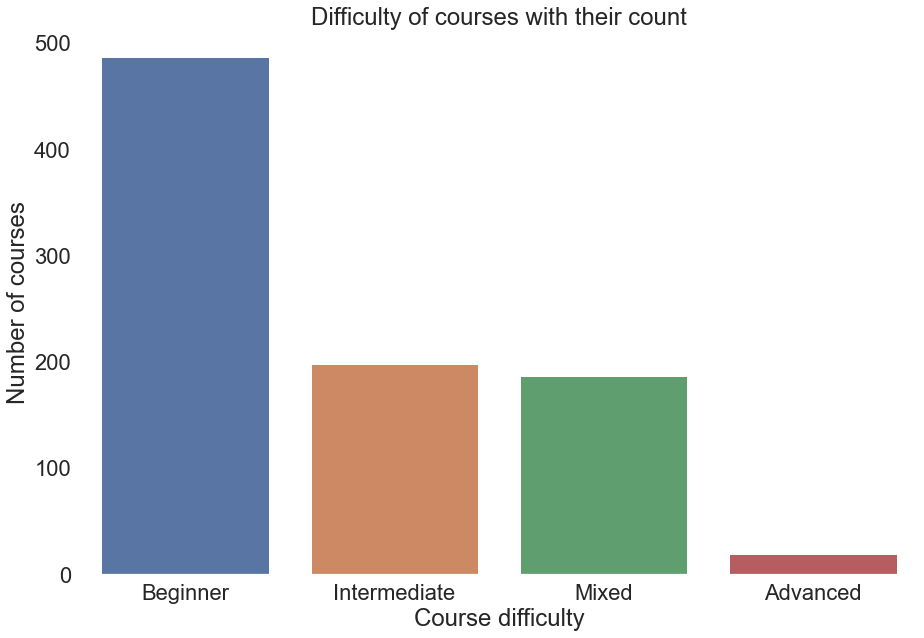

In [59]:
# Plotting the countplot

plt.figure(figsize=(15,10)) 
sns.countplot(x='course_difficulty', data=coursera_data)
sns.set_style("whitegrid")
plt.xlabel('Course difficulty')
plt.ylabel('Number of courses')
plt.title("Difficulty of courses with their count");

# Alternative way:
# fig_dims = (10,6)
# fig,ax = plt.subplots(figsize=fig_dims)
# sns.countplot(x='course_difficulty',data = coursera_data,ax=ax);

<em> Beginner level courses of all Coursera courses dominate almost by half of the other difficulty level courss combined. </em> 

<p> This is a nicer visualisation to the above box chart as it shows a pie plot of each difficulty level per total courses. </p>

In [60]:
# Plotting a pie chart 

fig=px.pie(coursera_data.groupby('course_difficulty').size().reset_index(), values=0, 
            names='course_difficulty', color_discrete_sequence=['blue', 'green', 'goldenrod', 'red'],
           labels={
                    '0': 'Courses',
                    'course_difficulty': 'Course Difficulty',
                 })
fig.update_layout(
    margin=dict(l=30, r=30, t=30, b=30))
fig.update_layout(title_text='Amount of levels based on count of courses', title_x=0.45)
iplot(fig)

<em> Most courses are enrolled as beginner levels (54.7%), then intermediate (22.2%) with mixed (21%) and finally only 2.13% at advanced level. </em>

### How certifications and course difficulties compare against course counts?


<p> In the below cell plotting sublots of certification types and course difficulties versus counts of courses. </p>
<p> The first subplot (left side) looks into the course difficulties versus the total count of courses in respective certification type. </p>
<p> The second subplot (right side) plots the subplot of certification type versus the total count of courses in respective difficulty type. </p>

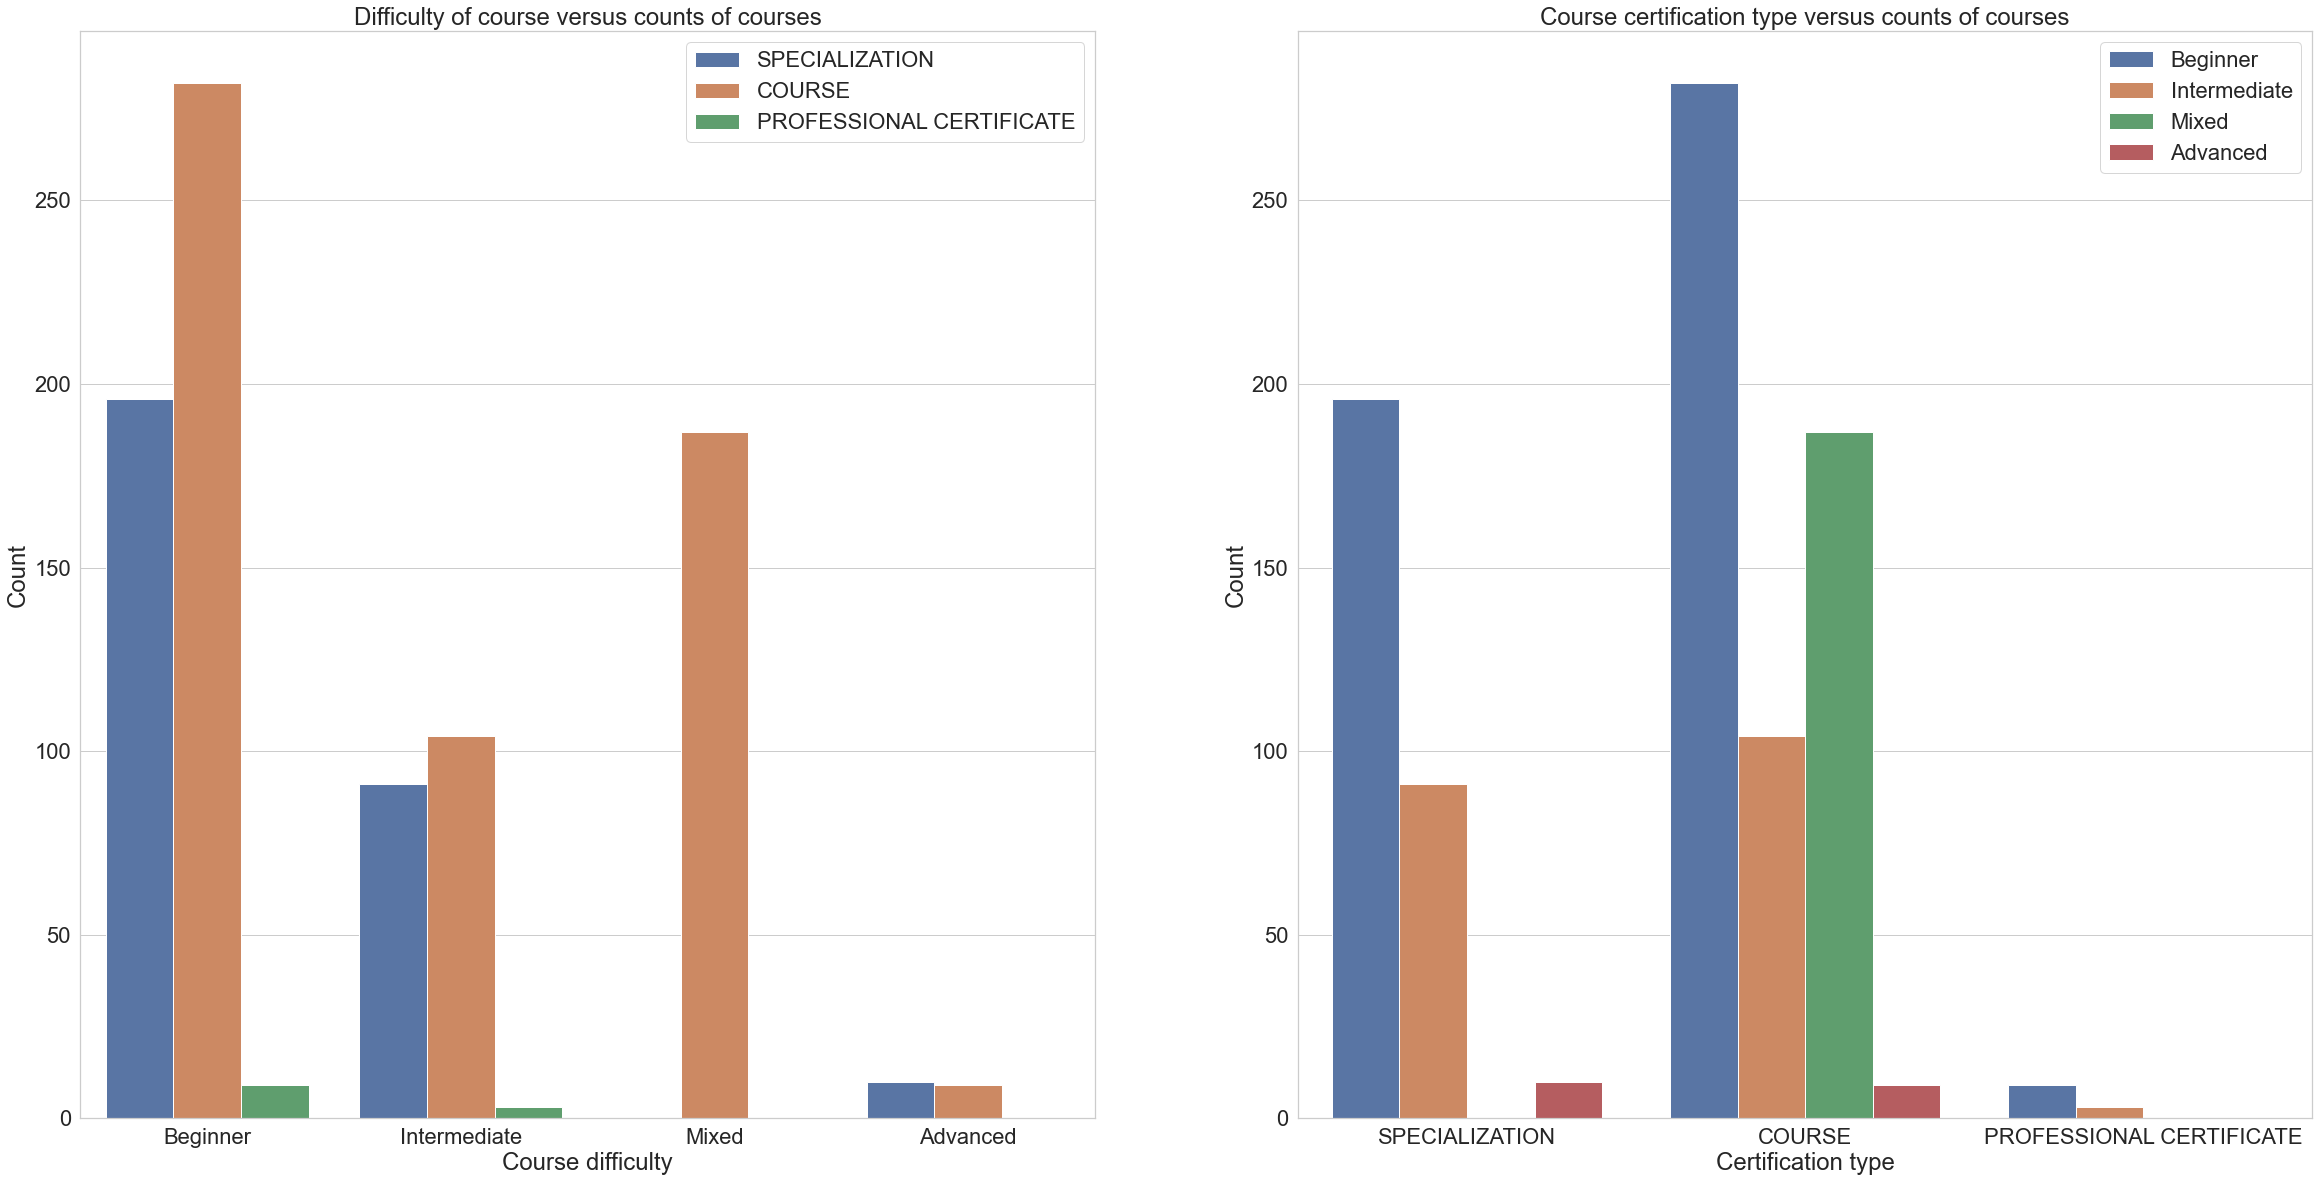

In [61]:
# Defining sublots

figure, ax = plt.subplots(1, 2, figsize= (40,20))

# First subplot 

sns.countplot(coursera_data['course_difficulty'], ax=ax[0], hue=coursera_data['course_Certificate_type'])
sns.set_style("whitegrid")
ax[0].set_title("Difficulty of course versus counts of courses")
ax[0].legend(loc=1) 
ax[0].set(xlabel='Course difficulty', ylabel='Count')

# Second subplot

# coursera = coursera_data.sort_values('course_Certificate_type', axis=0, ascending=True)
sns.set_style("whitegrid")
sns.countplot(coursera_data['course_Certificate_type'], ax=ax[1], hue=coursera_data['course_difficulty'])
ax[1].set_title("Course certification type versus counts of courses")
ax[1].legend(loc=1)
ax[1].set(xlabel='Certification type', ylabel='Count')

# Plotting subplots

figure.show;

<em> It seems like there are almost two thirds of courses compared to specializations and professional certificates while Beginner courses dominate for all certification types with mixed level being only the case in Coursera courses. </em>

<p> The below cell shows a plot of the total number of courses versus course ratings with each rating showing how many courses are there of a particular course difficulty. </p>
<p> In other words the below plot looks into the course ratings and for each rating gives the total count of courses in respective difficulty type. </p>

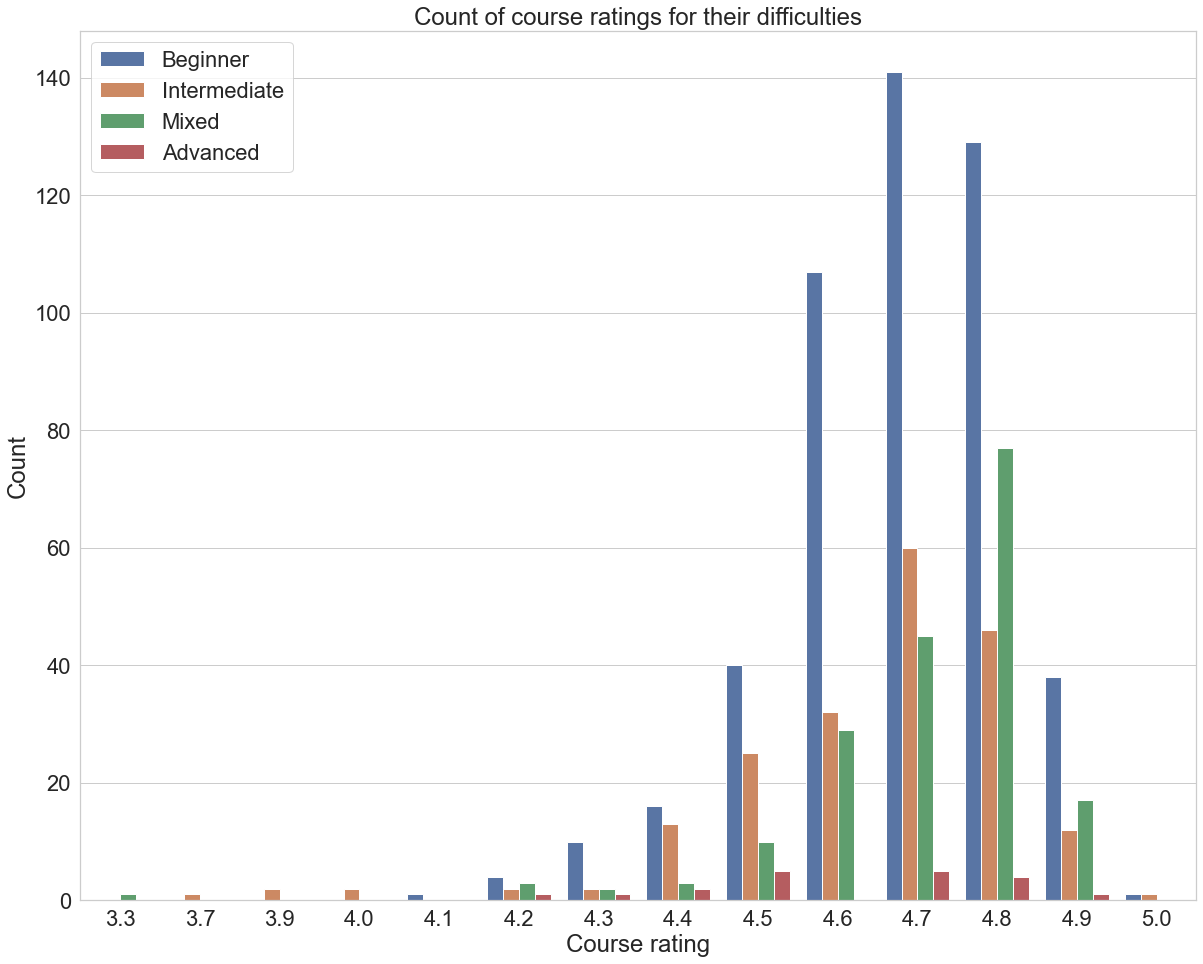

In [62]:
# Plotting a plot 

fig,ax = plt.subplots(figsize=(20,16))
sns.countplot(data=coursera_data,x = 'course_rating',hue= 'course_difficulty',ax=ax)
sns.set_style("whitegrid")
ax.legend(loc=2)
ax.set(xlabel='Course rating', ylabel='Count')

plt.title('Count of course ratings for their difficulties');

<em> Coursera courses despite their difficulty levels are evaluated high with most being beginner level courses. </em>

<p> The below cell gives an interactive plot showing all courses of all organisations with repect to the course difficulties and course ratings. When you press on a dot you are given 'Course difficulty', 'Organisation', 'Course title' and 'Course rating'. </p>

In [63]:
# Plotting an interactive scatter plot that looks into all organisations, courses and course ratings

fig = px.scatter(coursera_data, x="course_difficulty", y="course_organization", 
                 color="course_rating", 
                 labels={
                     'course_difficulty': 'Course difficulty',
                     'course_organization': 'Organisation',
                     'course_title': 'Course title',
                     'course_rating': 'Course rating'
                 },
                 hover_data=['course_title', 'course_rating'])
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

<em> There is a nice distribution of courses by various organisations when inspecting their ratings. </em>

Below is the word cloud that shows what words attract a student to enroll in the course.

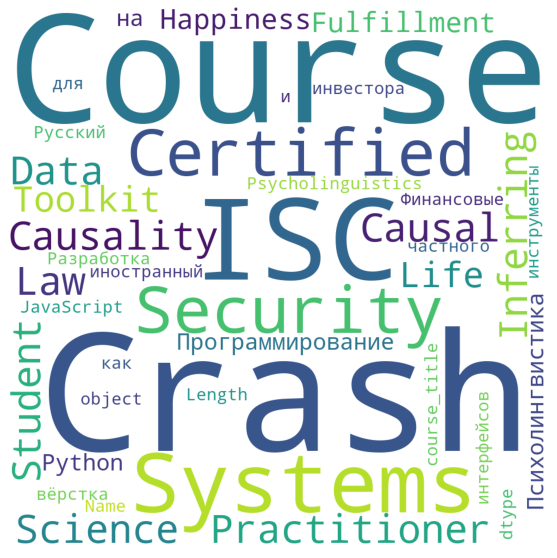

In [64]:
# Plotting a wordcloud that looks into most popular words 

wordcloud = WordCloud(width = 1000, height = 1000, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(coursera_data['course_title']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<em> The most popular words that attract users to enroll in the courses are Crash, Course, Systems, ISC and Security. </em>

# Final visualisation analysis

<p> How many courses are there provided by the Coursera in general compared to the ones that give only specializations or professional certificates? </p>
<p> In the final visualization cell we are plotting a pie chart of each certification type. </p>

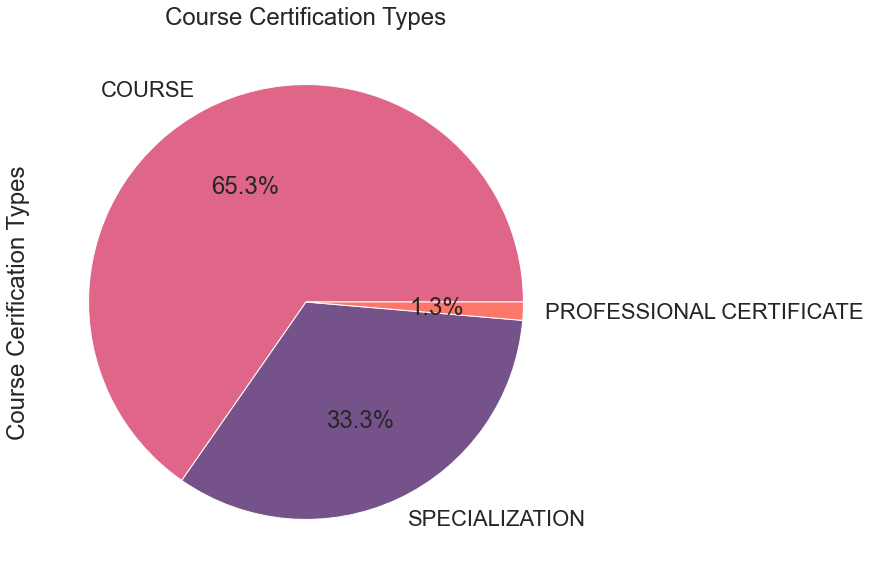

In [65]:
# Plotting a pie chart

colors =  ["#DF6589FF", "#76528BFF","#FC766AFF"]
ax= coursera_data['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10))
plt.title('Course Certification Types') 
plt.ylabel('Course Cerification Types')
plt.show();

<p> <em> It seems that there are more courses provided by the Coursera than there are courses for professional certificates, which majority of students take. </em> </p>

# Improvements
* Use one hot encoding (OHE) to help analyse categorical variables by coverting them to numbers to get correlations.
* Provide more interactive visualizations after OHE.
* Import data from other platforms and comparing them all.
* Improve data visualization by comparing with other platforms like edx or udemy.

# Conclusion

* University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
* Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with the highest rating.
* There is no Computer Science course in the top 10 highest rated courses on Coursera.
* Course difficulty does affect the number of students enrolled. There are more students enrolled in Beginner and Mixed level of difficulty courses than Intermediate and Advanced.
* Course difficulty does not affect course rating.
* Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
* Certificate type does not impact course rating.
* There is no strong relation to prove that if more number of students are enrolled in a course, the course rating is higher.
* Assumption that more number of students enrolled in the course does lead to a higher rating is false.
* Total students enrolled are in the beginner level courses followed by mixed level, then intermediate and a small portion of students are enrolled in advanced level courses.
* Most popular professional certificates are given by SAS programmer and Google that make more than 50% of all these certificates.
* Most popular specializations are Python for Everybody, Deep Learning and Improve Your English Communication Skills that make more than 35% of top 20 specializations.
* Most popular Coursera courses with a rating of 4.6 or higher are Machine Learning, The Science of Well-Being & Programming for Everybody (Getting Started with Python) that make more than 50% of top 18 courses.
* Most popular courses  in general irrespective of certifcation type and according to students enrolled are Machine Learning, The Science of Well-Being and Python for Everybody with a total of more than 6 million students enrolled.
* There is no correlation between two numeric features.
* Most courses are enrolled as beginner levels, then intermediate with mixed and finally at advanced level.
* There are more than 50% begginer level courses based on the total count of courses.
* There are much more courses than specializations and professional certificates combined while Beginner courses dominate for all certification types.
* Most courses are evaluated high with most ratings being beginner level courses. 
* The most popular words that attract users to enroll in the courses are Crash, Course, Systems and ISC.
* There are more courses provided by the Coursera than there are courses for professional certificates, which majority of students take.